In [28]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


c:\software\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
# It appears that rayopt requires distance rather than
# thickness quoted in patent literature
# So we have to move the thickness value one row down
# 
# The first surface represents the Object (O)
# The last surface represents the Image (I)

description = "Doublegauss-Nikkor-Wakamiya-50mmf1.4-US4448497"
columns = "type distance roc diameter material"
text = """
O 20       0          100   AIR
S 5.0      78.360     76.0  1.79668/45.5
S 9.8837   469.477    76.0  AIR
S 0.1938   50.297     64.0  1.77279/49.4
S 9.1085   74.376     62.0  AIR
S 2.9457   138.143    60.0  1.6727/32.2
S 2.3256   34.326     51.0  AIR
A 16.0698  0          49.2  AIR
S 13.0     -34.407    48.8  1.74/28.3
S 1.938    -2906.977  57.0  1.77279/49.4
S 12.403   -59.047    60.0  AIR
S 0.3876   -150.890   66.8  1.78797/47.5
S 8.333    -57.890    67.8  AIR
S 0.1938   284.630    66.0  1.78797/47.5
S 5.0388   -253.217   66.0  AIR
I 74.1     0          86.53 AIR
"""

In [30]:
s = ro.system_from_text(text, columns.split(),
    description=description, scale=0.5e-3)
s.object.angle = np.deg2rad(23)
s.fields = 0, .7, 1.
#s.wavelengths = [587.5618e-9]

In [31]:
s.update()
print(s)

System: Doublegauss-Nikkor-Wakamiya-50mmf1.4-US4448497
Scale: 0.5 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 23 deg
 Pupil:
   Pupil Distance: 54.9467
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 35.1302
Image:
 Radius: 43.3
 Update Radius: True
 Pupil:
   Pupil Distance: -132.271
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 46.502
Stop: 7
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      78.36         76                 -   1.797   1.797   45.50
 2 S     9.8837      469.5         76         basic/air   1.000   1.000   89.30
 3 S     0.1938       50.3         64                 -   1.773   1.773   49.40
 4 S     9.1085      74.38         62         basic/air   1.000   1.000   89.30
 5 S     2.9457      138.1         60                 -   1.673   1.673   32.20
 6 S     2.3256      34

System: Doublegauss-Nikkor-Wakamiya-50mmf1.4-US4448497
Scale: 0.5 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 23 deg
 Pupil:
   Pupil Distance: 54.9467
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 35.1302
Image:
 Radius: 43.3
 Update Radius: True
 Pupil:
   Pupil Distance: -132.271
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 46.502
Stop: 7
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf        100         basic/air   1.000   1.000   89.30
 1 S          5      78.36         76                 -   1.797   1.797   45.50
 2 S     9.8837      469.5         76         basic/air   1.000   1.000   89.30
 3 S     0.1938       50.3         64                 -   1.773   1.773   49.40
 4 S     9.1085      74.38         62         basic/air   1.000   1.000   89.30
 5 S     2.9457      138.1         60                 -   1.673   1.673   32.20
 6 S     2.3256      34

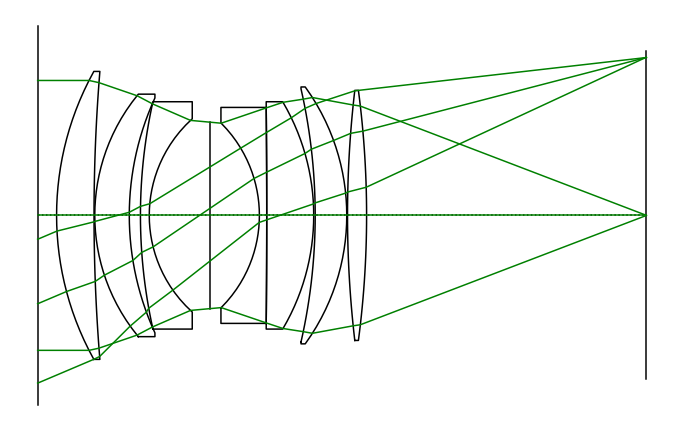

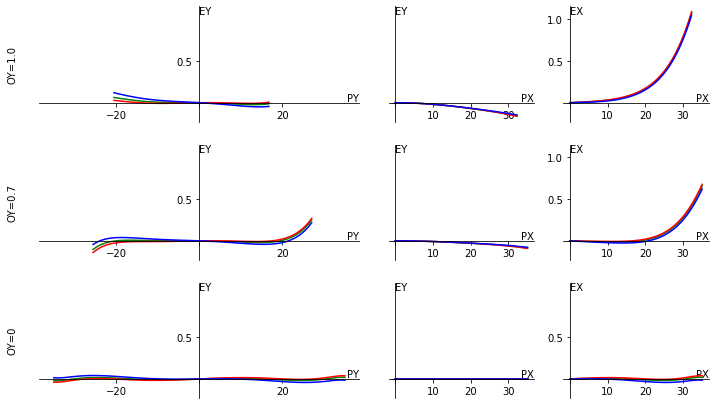

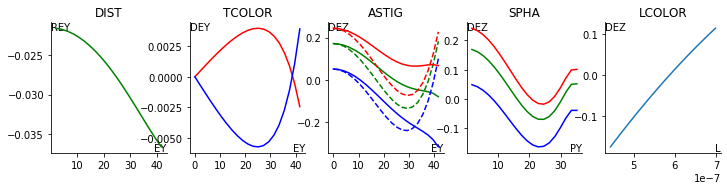

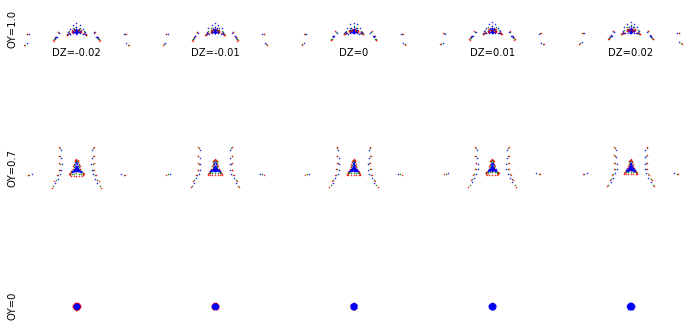

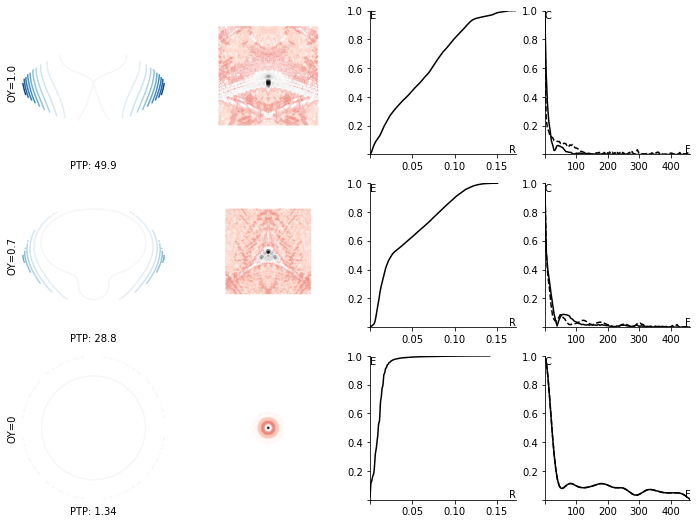

In [32]:
ro.Analysis(s)